<a href="https://colab.research.google.com/github/durbin-164/TensorFlow-Basic-Work/blob/master/Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Took help from.. 

https://towardsdatascience.com/deep-neural-networks-from-scratch-in-python-451f07999373

In [1]:
#!pip install tensorflow==2.0.0-beta1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

print(tf.__version__)

2.0.0-beta1


In [0]:
def sigmoid(Z):
  
  return 1.0/(1+tf.exp(-Z))

In [3]:
Z = tf.constant([[1],[2],[3]], dtype=tf.float32)
print(sigmoid(Z))

tf.Tensor(
[[0.26894143]
 [0.11920292]
 [0.04742587]], shape=(3, 1), dtype=float32)


In [0]:
def relu(Z):
  
  return tf.maximum(0,Z)

In [7]:
Z2 = tf.constant([[1],[-2],[3]], dtype=tf.float32)
print(relu(Z2))

tf.Tensor(
[[1.]
 [0.]
 [3.]], shape=(3, 1), dtype=float32)


In [0]:
def sigmoid_backward(Z):
  A = sigmoid(Z)
  return A*(1.0-A)

In [10]:
print(sigmoid_backward(sigmoid(Z)))

tf.Tensor(
[[0.19661194]
 [0.10499358]
 [0.04517666]], shape=(3, 1), dtype=float32)


In [0]:
def relu_backward(Z):
  dg = tf.zeros(Z.shape, dtype = tf.float32)
  dg = Z>0.0
  
  return tf.cast(dg,dtype=tf.float32)

In [0]:
nn_architecture = [
    {'layer_size' : 4, 'activation' : 'none'},
    {'layer_size' : 5, 'activation' : 'relu'},
    {'layer_size' : 4, 'activation' : 'relu'},
    {'layer_size' : 3, 'activation' : 'relu'},
    {'layer_size' : 1, 'activation' : 'sigmoid'},

    
]

In [0]:
def initialize_parameters(nn_architecture):
  
  number_of_layers = len(nn_architecture)
  
  parameters = {}
  
  for l in range(1,number_of_layers):
    
    parameters['W'+str(l)] = tf.random.normal(
        [nn_architecture[l]['layer_size'],
         nn_architecture[l-1]['layer_size']]
    )
    
    parameters['b'+str(l)] = tf.zeros([nn_architecture[l]['layer_size'],1], dtype =tf.float32)
    
  
  return parameters

In [21]:
parameters = initialize_parameters(nn_architecture)

print(parameters['W1'])
print(parameters['b1'])

tf.Tensor(
[[ 1.6818744   1.3862405  -2.3580387   0.02944736]
 [ 0.16204597  1.471661    1.4894778   0.3451424 ]
 [ 1.1557723  -0.1873511   0.21727794  0.97656727]
 [-0.51883686  1.9910381  -1.7266572   1.6955078 ]
 [-0.6553803  -1.2042028   0.74510664  0.15847689]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


In [0]:
def linear_forward(A,W,b):
  #print(W.shape,A.shape)
  return tf.matmul(W,A)+b

In [0]:
def linear_activation_forward(A_prev,W,b,activation):
  
  Z = linear_forward(A_prev, W,b)
  if activation == 'sigmoid':
    A = sigmoid(Z)
  elif activation == 'relu':
    A = relu(Z)
  return Z,A
    
  

In [0]:
def forward_prop(X,parameters,nn_architecture):
  
  forward_cache = {}
  forward_cache['A0'] = X
  
  number_of_layers = len(nn_architecture)
  
  A = X
  
  for l in range(1,number_of_layers):
    A_prev = A
    
    activation = nn_architecture[l]['activation']
    W = parameters['W'+str(l)]
    b = parameters['b'+str(l)]
    
    Z,A = linear_activation_forward(A_prev,W,b,activation)
    
    forward_cache['Z'+str(l)] = Z
    forward_cache['A'+str(l)] =A
    
  
  AL = A #last layer output for cost function
  
  return AL,forward_cache

    

In [88]:
X = tf.constant([[1,2,3,4],[5,6,7,8],[10,11,12,13],[14,15,16,17]], dtype=tf.float32)
print(X.shape)
AL,forward_cache = forward_prop(X,parameters, nn_architecture)

(4, 4)


In [0]:
def compute_cost(AL,Y):
  
  cost = -(1.0/Y.shape[1])*tf.reduce_sum(Y*tf.math.log(AL)+(1-Y)*tf.math.log(1-AL))
  
  return tf.squeeze(cost)

In [0]:
def linear_backward(dZ,A_prev,W):
  
  m = A_prev.shape[1]
  
  dW =(1.0/m)*tf.matmul(dZ,tf.transpose(A_prev))
  db = (1.0/m)*tf.reduce_sum(dZ,axis=1, keepdims = True)
  
  dA_prev = tf.matmul(tf.transpose(W), dZ)
  
  return dW,db, dA_prev

In [0]:
def linear_activation_backward(dA, Z, A_prev,W, activation):
  
  if activation == 'relu':
    dZ = dA*relu_backward(Z)
  elif activation == 'sigmoid':
    dZ = dA*sigmoid_backward(Z)
  
  dW,db,dA_prev = linear_backward(dZ,A_prev,W)
  
  return dW,db,dA_prev

In [0]:
def backward_prop(AL,Y,parameters,forward_cache,nn_architecture):
  
  grads = {}
  
  number_of_layers = len(nn_architecture)
  
  Y = tf.reshape(Y, AL.shape)
  
  dAL = -tf.divide(Y,AL)+tf.divide((1.0-Y),(1.0-AL))
  
  dA_prev = dAL
  
  for l in reversed(range(1,number_of_layers)):
    
    dA_curr = dA_prev
    W_curr = parameters['W'+str(l)]
    Z_curr = forward_cache['Z'+str(l)]
    A_curr = forward_cache['A'+str(l)]
    A_prev = forward_cache['A'+str(l-1)]
    activation = nn_architecture[l]['activation']
    

    dW,db,dA_prev = linear_activation_backward(dA_curr,Z_curr,A_prev,W_curr,activation)
    
    grads['dW'+str(l)] = dW
    grads['db'+str(l)] = db
      
  return grads

In [0]:
Y = tf.constant([[1,1,0,0]],dtype=tf.float32)
grads = backward_prop(AL,Y,parameters,forward_cache, nn_architecture)

In [0]:
def update_parameters(parameters,grads,learning_rate):
  
  number_of_parameters =int(len(parameters)/2)
  
  
  for l in range(1,number_of_parameters):
    
    parameters['W'+str(l)] -= learning_rate*grads['dW'+str(l)]
    parameters['b'+str(l)] -= learning_rate*grads['db'+str(l)]
    
  return parameters

In [98]:
parameters = update_parameters(parameters,grads, learning_rate=0.01)

4


In [0]:
def model(X,Y,nn_architecture,learning_rate, iteration):
  
  all_cost =[]
  parameters = initialize_parameters(nn_architecture)
  
  for i in range(iteration):
    
    AL, forward_cache = forward_prop(X, parameters, nn_architecture)
    
    cost = compute_cost(AL,Y)
    all_cost.append(cost)
    
    grads = backward_prop(AL,Y,parameters, forward_cache, nn_architecture)
    
    parameters = update_parameters(parameters,grads,learning_rate)
    
    if(i%1000)==0:
      print('Itertaion : {} :: Cost : {}'.format(i,cost))
      
   
  return parameters, all_cost
      

In [0]:
def predict(X,parameters,nn_architecture):
  
  A ,cache= forward_prop(X,parameters,nn_architecture)
  #print('____done___')
  predict = A>=0.5
  
  return tf.cast(predict,dtype = tf.float32)
  

In [0]:
def get_accuracy(Y,Y_pred):
  
  accuracy = np.sum(tf.equal(Y,Y_pred))
  
  accuracy = (100.0/Y.shape[1])*accuracy
  
  return accuracy

In [0]:
def make_dataset():
  
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/Admission_Predict_Ver1.1.csv')
  
  df.dropna()
  
  df2 = df.copy()
  df2.drop(df.columns[0], axis=1, inplace=True)
  
  data = df.values 
  min_max_scaler = preprocessing.MinMaxScaler()
  data = min_max_scaler.fit_transform(data)
 
  
  np.random.shuffle(data)
  
  data[:,-1] = data[:,-1]>=.6
  
  X = data[:,:-2]
  Y = data[:,-1]
  X= tf.cast(X,dtype=tf.float32)
  Y = tf.reshape(Y, [Y.shape[0],1])
  Y = tf.cast(Y, dtype=tf.float32)
  
  
  
  pk = int(0.9*X.shape[0])
  
  X_train = X[:pk,:]
  Y_train = Y[:pk,:]
  
  X_test = X[pk:,:]
  Y_test = Y[pk:,:]
  
  return tf.transpose(X_train), tf.transpose(Y_train), tf.transpose(X_test), tf.transpose(Y_test)
  

In [65]:
X_train,Y_train, X_test, Y_test = make_dataset()

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(np.sum(np.array(Y_train)==0.0))
print(np.sum(np.array(Y_train)==1.0))



(7, 450)
(1, 450)
(7, 50)
(1, 50)
213
237


In [86]:
learning_rate = 0.2
iteration=10000

nn_architecture = [
    {'layer_size' : X_train.shape[0], 'activation' : 'none'},
    {'layer_size' : 5, 'activation' : 'relu'},
    {'layer_size' : 4, 'activation' : 'relu'},
    {'layer_size' : 3, 'activation' : 'relu'},
    {'layer_size' : 1, 'activation' : 'sigmoid'}, 
]
parameters, all_cost = model(X_train,Y_train,nn_architecture, learning_rate,iteration)


Itertaion : 0 :: Cost : 3.492647647857666
Itertaion : 1000 :: Cost : 0.28662392497062683
Itertaion : 2000 :: Cost : 0.27198681235313416
Itertaion : 3000 :: Cost : 0.25056278705596924
Itertaion : 4000 :: Cost : 0.24064898490905762
Itertaion : 5000 :: Cost : 0.24034976959228516
Itertaion : 6000 :: Cost : 0.24009302258491516
Itertaion : 7000 :: Cost : 0.24000594019889832
Itertaion : 8000 :: Cost : 0.2399444878101349
Itertaion : 9000 :: Cost : 0.23985151946544647


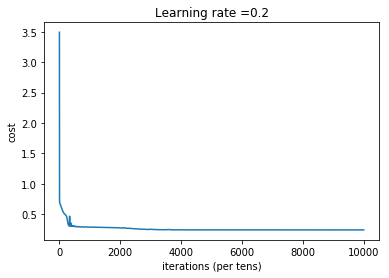

In [87]:
plt.plot(np.squeeze(all_cost))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [88]:
#print(train_parameters['b1'].shape)
Y_pred = predict(X_train, parameters,nn_architecture)
print('Train Accuracy: {}'.format(get_accuracy(Y_train,Y_pred)))

Y_pred = predict(X_test, parameters,nn_architecture)
print('Test Accuracy : {}'.format(get_accuracy(Y_test,Y_pred)))



Train Accuracy: 88.44444444444444
Test Accuracy : 78.0


In [139]:
learning_rate = 0.00001
iteration=1000
X = tf.constant([[0,0,1,1],[0,1,0,1]], dtype=tf.float32)
Y = tf.constant([[0,1,1,0]],dtype=tf.float32)
nn_architecture = [
    {'layer_size' : X.shape[0], 'activation' : 'none'},
    {'layer_size' : 5, 'activation' : 'relu'},
    {'layer_size' : 4, 'activation' : 'relu'},
    {'layer_size' : 3, 'activation' : 'relu'},
    {'layer_size' : 1, 'activation' : 'sigmoid'}, 
]

print(X.shape)
print(Y.shape)
parameters, all_cost = model(X,Y,nn_architecture, learning_rate,iteration)

(2, 4)
(1, 4)
Itertaion : 0 :: Cost : 0.6584997773170471
Itertaion : 100 :: Cost : 0.6583309173583984
Itertaion : 200 :: Cost : 0.6581624150276184
Itertaion : 300 :: Cost : 0.6579940319061279
Itertaion : 400 :: Cost : 0.6578258872032166
Itertaion : 500 :: Cost : 0.6576576828956604
Itertaion : 600 :: Cost : 0.6574901342391968
Itertaion : 700 :: Cost : 0.6573235988616943
Itertaion : 800 :: Cost : 0.6571574211120605
Itertaion : 900 :: Cost : 0.6569912433624268


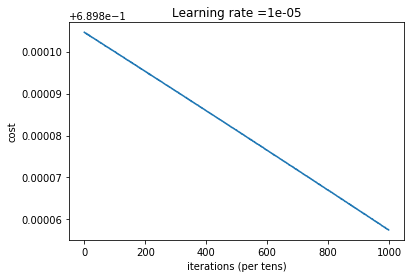

In [132]:
plt.plot(np.squeeze(all_cost))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [56]:
xx = tf.constant([[0., 1., 0., 0., 0.]], dtype = tf.float32)
print(np.sum(np.array(xx)==0.0))

4
